# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d25/391a2922ad597ba080f4b99dea6d62842562d64845ef5df1a384561e.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **New Delhi, National Capital Territory of Delhi, India**, and the stations the data comes from are shown on the map below.

In [409]:
%matplotlib notebook

<IPython.core.display.Javascript object>


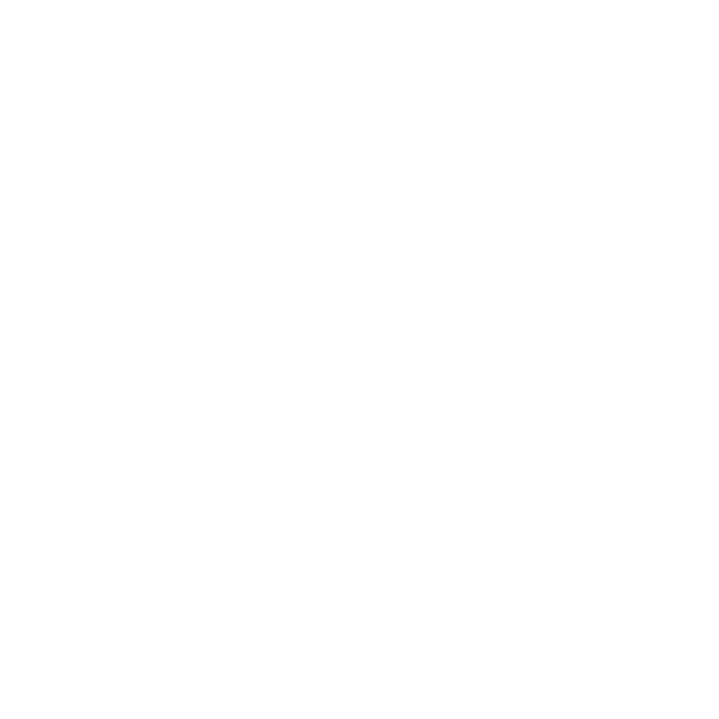

In [410]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(25,'391a2922ad597ba080f4b99dea6d62842562d64845ef5df1a384561e')

In [411]:
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d100/4e86d2106d0566c6ad9843d882e72791333b08be3d647dcae4f4b110.csv')
df.sort_values("Date" ,inplace=True)
min_df = df[df["Element"] == "TMIN"] 
max_df = df[df["Element"] == "TMAX"] 
min_df15 = df[(df['Element'] == 'TMIN') & (df.Date.str[0:4]  == '2015')]
max_df15 = df[(df['Element'] == 'TMAX') & (df.Date.str[0:4]  == '2015')]

df.tail()
min_df15.set_index("Date", inplace=True)
min_df15 = min_df15["Data_Value"]
max_df15.set_index("Date", inplace=True)
max_df15 = max_df15["Data_Value"]


In [412]:
import numpy as np
min_df = min_df.groupby(["Date"])["Data_Value"].min()
max_df = max_df.groupby(["Date"])["Data_Value"].max()
#min_df = min_df.combine_first(max_df)
#max_df = max_df.combine_first(min_df)
#min_df15 = min_df[min_df]
#xx = min_df.apply(lambda x: x['Date'][:4] == "2015")


In [413]:
max_df15

Date
2015-01-01    250
2015-01-01    266
2015-01-01    275
2015-01-02    302
2015-01-02    303
2015-01-02    310
2015-01-02    292
2015-01-03    308
2015-01-03    302
2015-01-03    316
2015-01-04    316
2015-01-04    316
2015-01-04    320
2015-01-04    321
2015-01-05    326
2015-01-05    314
2015-01-05    324
2015-01-06    313
2015-01-06    316
2015-01-06    309
2015-01-06    324
2015-01-07    311
2015-01-07    322
2015-01-07    312
2015-01-07    304
2015-01-08    300
2015-01-08    302
2015-01-08    312
2015-01-08    319
2015-01-09    270
             ... 
2015-12-24    306
2015-12-24    307
2015-12-24    296
2015-12-25    320
2015-12-25    318
2015-12-25    328
2015-12-26    319
2015-12-26    320
2015-12-26    320
2015-12-26    326
2015-12-27    317
2015-12-27    320
2015-12-27    326
2015-12-27    321
2015-12-28    320
2015-12-28    314
2015-12-28    307
2015-12-28    325
2015-12-29    307
2015-12-29    300
2015-12-29    292
2015-12-29    294
2015-12-30    324
2015-12-30    317
2015-

In [414]:
time_range = pd.date_range('2005-01-01', '2015-12-31')
min_df.index = pd.DatetimeIndex(min_df.index)
max_df.index = pd.DatetimeIndex(max_df.index)
min_df = min_df.reindex(time_range, method='ffill')
max_df = max_df.reindex(time_range, method='ffill')


In [415]:
for i in min_df.index:
    
    #print(i.month, i.day)
    if (i.month == 2) and (i.day == 29):
        min_df.drop(i, inplace=True)

for i in max_df.index:
    #print(i.month, i.day)
    if (i.month == 2) and (i.day == 29):
        max_df.drop(i, inplace=True)

In [416]:
i1 = min_df.index.tolist()
i1 = list(map(pd.to_datetime, i1))

In [417]:
print(len(min_df), len(max_df))

4015 4015


In [418]:
i2 = max_df.index.tolist()
i2 = list(map(pd.to_datetime, i2))

In [419]:
print(len(i1), len(i2))

4015 4015


In [420]:
i1_15 = min_df15.index.tolist()
i1_15 = list(map(pd.to_datetime, i1_15))

In [421]:
i2_15 = max_df15.index.tolist()
i2_15 = list(map(pd.to_datetime, i2_15))

In [422]:
min_df.index.month[0], min_df.index.day[0]

(1, 1)

In [423]:
# Now to check conditional on 2015 data, I'll collate the Record highs and Record lows from 2005 - 2014 in two series
month_day = set(str(i) + "-" + str(j) for i, j in zip(min_df.index.month, min_df.index.day))
month_day = list(month_day)
decade_high = {}
decade_low = {}

for element in month_day:
    elem = "2015-" + element
    greatest = 0
    for i, j, v in zip(max_df.index.month, max_df.index.day, max_df):
        if element == str(i) + "-" + str(j):
            if v > greatest:
                greatest = v
            
    decade_high[elem] = greatest
    

for element in month_day:
    elem = "2015-" + element
    lowest = 99999
    for i, j, v in zip(min_df.index.month, min_df.index.day, min_df):
        if element == str(i) + "-" + str(j):
            if v < lowest:
                lowest = v
            
    decade_low[elem] = lowest
    
decade_low

{'2015-1-1': 190,
 '2015-1-10': 200,
 '2015-1-11': 200,
 '2015-1-12': 190,
 '2015-1-13': 190,
 '2015-1-14': 200,
 '2015-1-15': 200,
 '2015-1-16': 210,
 '2015-1-17': 204,
 '2015-1-18': 206,
 '2015-1-19': 190,
 '2015-1-2': 196,
 '2015-1-20': 200,
 '2015-1-21': 200,
 '2015-1-22': 200,
 '2015-1-23': 202,
 '2015-1-24': 210,
 '2015-1-25': 210,
 '2015-1-26': 170,
 '2015-1-27': 200,
 '2015-1-28': 190,
 '2015-1-29': 198,
 '2015-1-3': 210,
 '2015-1-30': 200,
 '2015-1-31': 198,
 '2015-1-4': 186,
 '2015-1-5': 202,
 '2015-1-6': 200,
 '2015-1-7': 190,
 '2015-1-8': 184,
 '2015-1-9': 182,
 '2015-10-1': 200,
 '2015-10-10': 202,
 '2015-10-11': 200,
 '2015-10-12': 210,
 '2015-10-13': 206,
 '2015-10-14': 200,
 '2015-10-15': 204,
 '2015-10-16': 200,
 '2015-10-17': 200,
 '2015-10-18': 202,
 '2015-10-19': 214,
 '2015-10-2': 200,
 '2015-10-20': 190,
 '2015-10-21': 216,
 '2015-10-22': 210,
 '2015-10-23': 200,
 '2015-10-24': 200,
 '2015-10-25': 184,
 '2015-10-26': 190,
 '2015-10-27': 204,
 '2015-10-28': 208,
 '

In [424]:
decade_high = pd.DataFrame({"Date": pd.Series(decade_high).index, "Value": pd.Series(decade_high).values})
decade_low = pd.DataFrame({"Date": pd.Series(decade_low).index, "Value": pd.Series(decade_low).values})


In [425]:
decade_high["Date"] = pd.to_datetime(decade_high["Date"])
decade_low["Date"] = pd.to_datetime(decade_low["Date"])


In [426]:
decade_high.sort_values("Date", inplace=True)
decade_low.sort_values("Date", inplace=True)

In [427]:
decade_low

,Date,Value
0,2015-01-01,190
11,2015-01-02,196
22,2015-01-03,210
25,2015-01-04,186
26,2015-01-05,202
27,2015-01-06,200
28,2015-01-07,190
29,2015-01-08,184
30,2015-01-09,182
1,2015-01-10,200


In [428]:
decade_high.set_index("Date", inplace=True)

decade_low.set_index("Date", inplace=True)

In [429]:
decade_low

,Value
Date,
2015-01-01,190
2015-01-02,196
2015-01-03,210
2015-01-04,186
2015-01-05,202
2015-01-06,200
2015-01-07,190
2015-01-08,184
2015-01-09,182


In [430]:
# Now, checking for the 2015 conditional in the next few cells
# We will compare min_df15 with decade_low and max_df15 with decade_high 
# So first, we need them to have the same index vals and the same length
# Let's do that now
min_df15#.to_frame()


Date
2015-01-01    214
2015-01-01    248
2015-01-01    233
2015-01-02    245
2015-01-03    249
2015-01-03    240
2015-01-03    246
2015-01-04    248
2015-01-04    250
2015-01-04    236
2015-01-04    240
2015-01-05    237
2015-01-05    250
2015-01-05    241
2015-01-05    250
2015-01-06    240
2015-01-06    246
2015-01-06    251
2015-01-07    244
2015-01-07    244
2015-01-08    233
2015-01-08    240
2015-01-08    248
2015-01-09    244
2015-01-10    242
2015-01-10    230
2015-01-10    240
2015-01-10    237
2015-01-11    237
2015-01-11    240
             ... 
2015-12-22    250
2015-12-22    239
2015-12-23    244
2015-12-23    242
2015-12-23    235
2015-12-23    238
2015-12-24    235
2015-12-24    242
2015-12-25    228
2015-12-25    248
2015-12-25    228
2015-12-25    236
2015-12-26    248
2015-12-26    259
2015-12-27    256
2015-12-27    234
2015-12-27    240
2015-12-27    253
2015-12-28    230
2015-12-28    260
2015-12-28    242
2015-12-29    240
2015-12-29    238
2015-12-29    250
2015-

In [431]:
min_df15 = min_df15.groupby(min_df15.index).min()
max_df15 = max_df15.groupby(max_df15.index).max()
#Now, the lengths are equal. Both equal 365 now, that is the number of days in 2015
#overlay_low = [min_df15[min_df15[i] < decade_low[i]] for i in range(len(min_df15))]


In [432]:
#decade_low = decade_low.reset_index
#type(decade_low)#[1]

decade_low = decade_low.T.iloc[0] # Converting DataFrame to Series to make it eligible for comparing
decade_high = decade_high.T.iloc[0] # Converting DataFrame to Series to make it eligible for comparing
#[print(min_df15[i] , decade_low[i]) for i in range(len(min_df15))]
#broken_min = np.where(temp_min_15['Data_Value'] < temp_min['Data_Value'])[0]

In [433]:
#overlay_low = [(min_df15[i] < decade_low[i]) for i in range(len(min_df15))]
overlay_low = np.where(min_df15 <= decade_low)
overlay_high = np.where(max_df15 >= decade_high)

overlay_high = max_df15.iloc[overlay_high]
overlay_low = min_df15.iloc[overlaw_low]
overlay_high

Date
2015-01-10    330
2015-01-13    328
2015-01-15    325
2015-01-19    322
2015-01-27    324
2015-02-27    332
2015-04-02    334
2015-04-17    340
2015-04-18    344
2015-04-20    341
2015-04-22    338
2015-04-24    341
2015-05-14    342
2015-05-19    335
2015-05-30    342
2015-06-01    339
2015-06-05    343
2015-06-26    331
2015-06-27    334
2015-06-29    330
2015-06-30    333
2015-07-02    336
2015-07-03    327
2015-07-08    331
2015-07-09    327
2015-07-11    328
2015-07-12    330
2015-07-16    328
2015-07-18    328
2015-07-19    330
             ... 
2015-10-03    333
2015-10-10    333
2015-10-12    331
2015-10-13    341
2015-10-14    337
2015-10-17    334
2015-10-18    339
2015-10-19    334
2015-10-20    333
2015-10-22    336
2015-10-26    336
2015-11-02    335
2015-11-13    327
2015-11-14    334
2015-11-15    325
2015-11-19    329
2015-11-20    326
2015-11-23    336
2015-11-30    330
2015-12-04    330
2015-12-05    324
2015-12-10    327
2015-12-19    325
2015-12-20    331
2015-

<IPython.core.display.Javascript object>


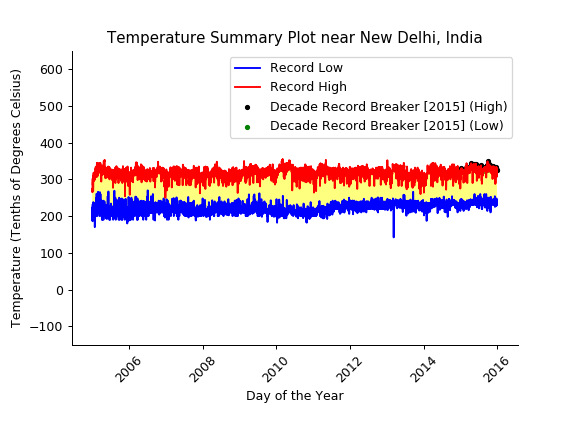

In [435]:
plt.figure()
plt.plot(i1, min_df, "-", c='b', label="Record Low")
plt.plot(i2, max_df, "-", c='r', label="Record High")
#plt.scatter(i1_15, min_df15, c="k", label="2015low")
plt.scatter(overlay_high.index, overlay_high, c="k", label="Decade Record Breaker [2015] (High)", s=10)
plt.scatter(overlay_low.index, overlay_low, c="g", label="Decade Record Breaker [2015] (Low)", s=10)
plt.gca().fill_between(i1, min_df, max_df, facecolor='yellow', alpha=0.5)
plt.gca().set_ylim([-150, 650])
plt.legend()
plt.xlabel('Day of the Year')
plt.ylabel('Temperature (Tenths of Degrees Celsius)')
plt.title('Temperature Summary Plot near New Delhi, India')
plt.xticks(rotation = '45')
plt.subplots_adjust(bottom=0.2)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()